In [1]:
import sqlite3

# Connect to SQLite database
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

# Create a sample sales table
cursor.execute('''
    CREATE TABLE IF NOT EXISTS sales (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        product TEXT,
        quantity INTEGER,
        price REAL
    )
''')

# Insert sample data
sample_data = [
    ("Shoes", 10, 50),
    ("Shirts", 20, 30),
    ("Pants", 15, 40),
    ("Shoes", 5, 50),
    ("Shirts", 10, 30)
]

cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_data)
conn.commit()
conn.close()

In [2]:
import sqlite3
import pandas as pd

# Connect to database
conn = sqlite3.connect("sales_data.db")

# SQL Query to summarize sales
query = """
SELECT 
    product, 
    SUM(quantity) AS total_qty, 
    SUM(quantity * price) AS revenue 
FROM sales 
GROUP BY product
"""

# Run the query and load into pandas DataFrame
df = pd.read_sql_query(query, conn)
conn.close()

# Print the summary
print(df)

  product  total_qty  revenue
0   Pants         15    600.0
1  Shirts         30    900.0
2   Shoes         15    750.0


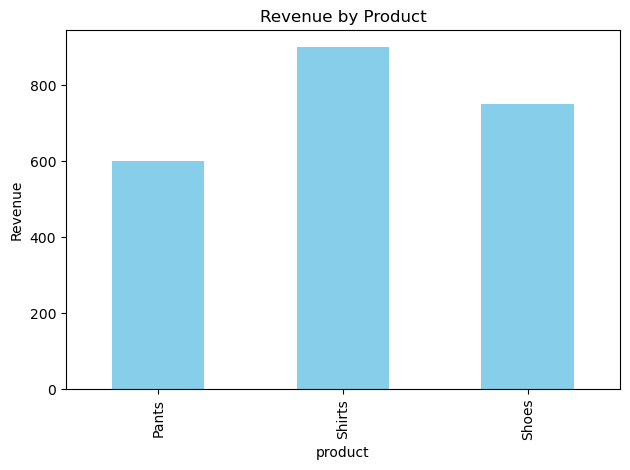

In [3]:
import matplotlib.pyplot as plt

df.plot(kind='bar', x='product', y='revenue', legend=False, color='skyblue')
plt.title("Revenue by Product")
plt.ylabel("Revenue")
plt.tight_layout()
plt.savefig("sales_chart.png") 
plt.show()